231934
216688
91278
304938
m    4000
b    4000
t    4000
e    4000
Name: CATEGORY, dtype: int64
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 19, 128)           2560000   
_________________________________________________________________
spatial_dropout1d_4 (Spatial (None, 19, 128)           0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 15, 64)            41024     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 3, 64)             0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 3, 400)            744000    
_________________________________________________________________
bidirectional_4 (Bidirection (None, 392)               936096    
______________________________________________

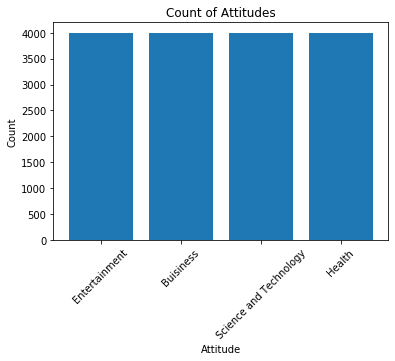

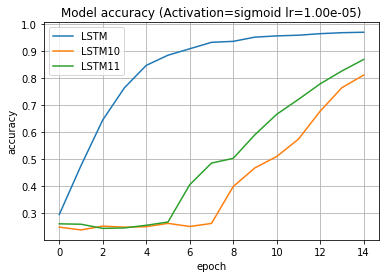

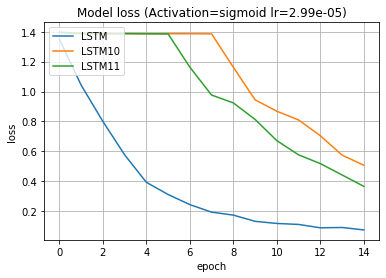

score: 1.07 acc: 0.69


In [2]:
import numpy as np 
import sys
import pandas as pd 
from keras.optimizers import Adam
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Conv1D, MaxPooling1D,Bidirectional,Dropout
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re
from slim21 import LSTMs
from keras.utils import plot_model

import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('uci-news-aggregator.csv')
data = data[['TITLE','CATEGORY']]

#data = data[data.sentiment != "Neutral"]

#data['TITLE'] = data['TITLE'].apply(lambda x: x.lower())
#data['TITLE'] = data['TITLE'].apply((lambda x: re.sub('[^a-zA-z0-9\s]', '', x)))

print(data[data['CATEGORY'] == 'b'].size)
print(data[data['CATEGORY'] == 't'].size)
print(data[data['CATEGORY'] == 'm'].size)
print(data[data['CATEGORY'] == 'e'].size)

#Mood_count=data['CATEGORY'].value_counts()
#print(Mood_count)
#m = data[data["CATEGORY"] == "m"]
datab= data[data["CATEGORY"] == "b"].sample(n=4000)
datat= data[data["CATEGORY"] == "t"].sample(n=4000)
datae= data[data["CATEGORY"] == "e"].sample(n=4000)
datam= data[data["CATEGORY"] == "m"].sample(n=4000)
#print(datab[datab['CATEGORY']=='b'])
#print(datat[datat['CATEGORY']=='t'])
#print(datae[datae['CATEGORY']=='e'])
final_data=pd.concat([datam,datab,datat,datae])
#print(final_data)
final_data.to_csv('final_data.csv')
Mood_count=final_data['CATEGORY'].value_counts()
print(Mood_count)
Index = [2,1,3,4]
plt.bar(Index,Mood_count)
plt.xticks(Index,['Buisiness','Entertainment','Science and Technology','Health'],rotation=45)
plt.ylabel('Count')
plt.xlabel('Attitude')
plt.title('Count of Attitudes')
#g = data.groupby('CATEGORY')
#g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True))
tokenizer = Tokenizer(num_words=20000, split=' ')
tokenizer.fit_on_texts(final_data['TITLE'].values)
X = tokenizer.texts_to_sequences(final_data['TITLE'].values)
X = pad_sequences(X)

model = Sequential()
model.add(Embedding(20000, 128,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.7))
model.add(Conv1D(64,5,padding='valid',activation='relu',strides=1))
model.add(MaxPooling1D(pool_size=4))
#model.add(LSTMs(implementation= 1,return_sequences=True,units=400,activation='sigmoid',input_shape=X.shape[1:], model='LSTM1'))
model.add(LSTM(400,return_sequences=True))
model.add(Bidirectional(LSTM(196, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(4,activation='softmax'))
adam = Adam(lr=1.00e-05, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())


#plot_model(model, show_shapes=True,to_file='model_LSTM1.png')

Y = pd.get_dummies(final_data['CATEGORY']).values
np.set_printoptions(threshold=sys.maxsize)
#print(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

batch_size = 64
history = model.fit(X_train, Y_train,validation_split=0.33 ,epochs = 15, batch_size=batch_size, verbose = 1)
score,acc = model.evaluate(X_test, Y_test, verbose = 2, batch_size = batch_size)

print("score: %.2f acc: %.2f" % (score,acc))
model = Sequential()
model.add(Embedding(20000, 128,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.7))
model.add(Conv1D(64,5,padding='valid',activation='relu',strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTMs(implementation= 1,return_sequences=True,units=400,activation='sigmoid',input_shape=X.shape[1:], model='LSTM10'))
#model.add(LSTM(400,return_sequences=True))
model.add(Bidirectional(LSTM(196, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(4,activation='softmax'))
adam = Adam(lr=1.00e-05, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

#plot_model(model, show_shapes=True,to_file='model_LSTM1.png')

Y = pd.get_dummies(final_data['CATEGORY']).values
#np.set_printoptions(threshold=sys.maxsize)
#print(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

batch_size = 64
history2 = model.fit(X_train, Y_train,validation_split=0.33 ,epochs = 15, batch_size=batch_size, verbose = 1)
score,acc = model.evaluate(X_test, Y_test, verbose = 2, batch_size = batch_size)

print("score: %.2f acc: %.2f" % (score,acc))
model = Sequential()
model.add(Embedding(20000, 128,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.7))
model.add(Conv1D(64,5,padding='valid',activation='relu',strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTMs(implementation= 1,return_sequences=True,units=400,activation='sigmoid',input_shape=X.shape[1:], model='LSTM11'))
#model.add(LSTM(400,return_sequences=True))
model.add(Bidirectional(LSTM(196, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(4,activation='softmax'))
adam = Adam(lr=1.00e-05, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

score,acc = model.evaluate(X_test, Y_test, verbose = 2, batch_size = batch_size)
#plot_model(model, show_shapes=True,to_file='model_LSTM1.png')

Y = pd.get_dummies(final_data['CATEGORY']).values
#np.set_printoptions(threshold=sys.maxsize)
#print(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

batch_size = 64
history3 = model.fit(X_train, Y_train,validation_split=0.33 ,epochs = 15, batch_size=batch_size, verbose = 1)
score,acc = model.evaluate(X_test, Y_test, verbose = 2, batch_size = batch_size)

print("score: %.2f acc: %.2f" % (score,acc))

###################################################
#######################################################################################################################
print(history.history.keys())

fig = plt.figure()

plt.plot(history.history['acc'])
plt.plot(history2.history['acc'])
plt.plot(history3.history['acc'])
plt.title('Model accuracy (Activation=sigmoid lr=1.00e-05)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['LSTM','LSTM10','LSTM11'], loc='upper left')
plt.grid(True)
plt.show()

plt.plot(history.history['loss'])
plt.plot(history2.history['loss'])
plt.plot(history3.history['loss'])
plt.title('Model loss (Activation=sigmoid lr=2.99e-05)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['LSTM','LSTM10','LSTM11'], loc='upper left')
plt.grid(True)
plt.show()
#
fig.savefig('performance_LSTM1.png')

score,acc = model.evaluate(X_test, Y_test, verbose = 2, batch_size = batch_size)

print("score: %.2f acc: %.2f" % (score,acc))


